In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import cross_val_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [199]:
data = pd.read_csv('./weather_aus.csv')
data.dropna(inplace=True)

In [200]:
data.info

<bound method DataFrame.info of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
6049    2009-01-01    Cobar     17.9     35.2       0.0         12.0   
6050    2009-01-02    Cobar     18.4     28.9       0.0         14.8   
6052    2009-01-04    Cobar     19.4     37.6       0.0         10.8   
6053    2009-01-05    Cobar     21.9     38.4       0.0         11.4   
6054    2009-01-06    Cobar     24.2     41.0       0.0         11.2   
...            ...      ...      ...      ...       ...          ...   
142298  2017-06-20   Darwin     19.3     33.4       0.0          6.0   
142299  2017-06-21   Darwin     21.2     32.6       0.0          7.6   
142300  2017-06-22   Darwin     20.7     32.8       0.0          5.6   
142301  2017-06-23   Darwin     19.5     31.8       0.0          6.2   
142302  2017-06-24   Darwin     20.2     31.7       0.0          5.6   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
6049        12.3         SSW

In [201]:
data.isnull().sum()*100/len(data)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

<Axes: >

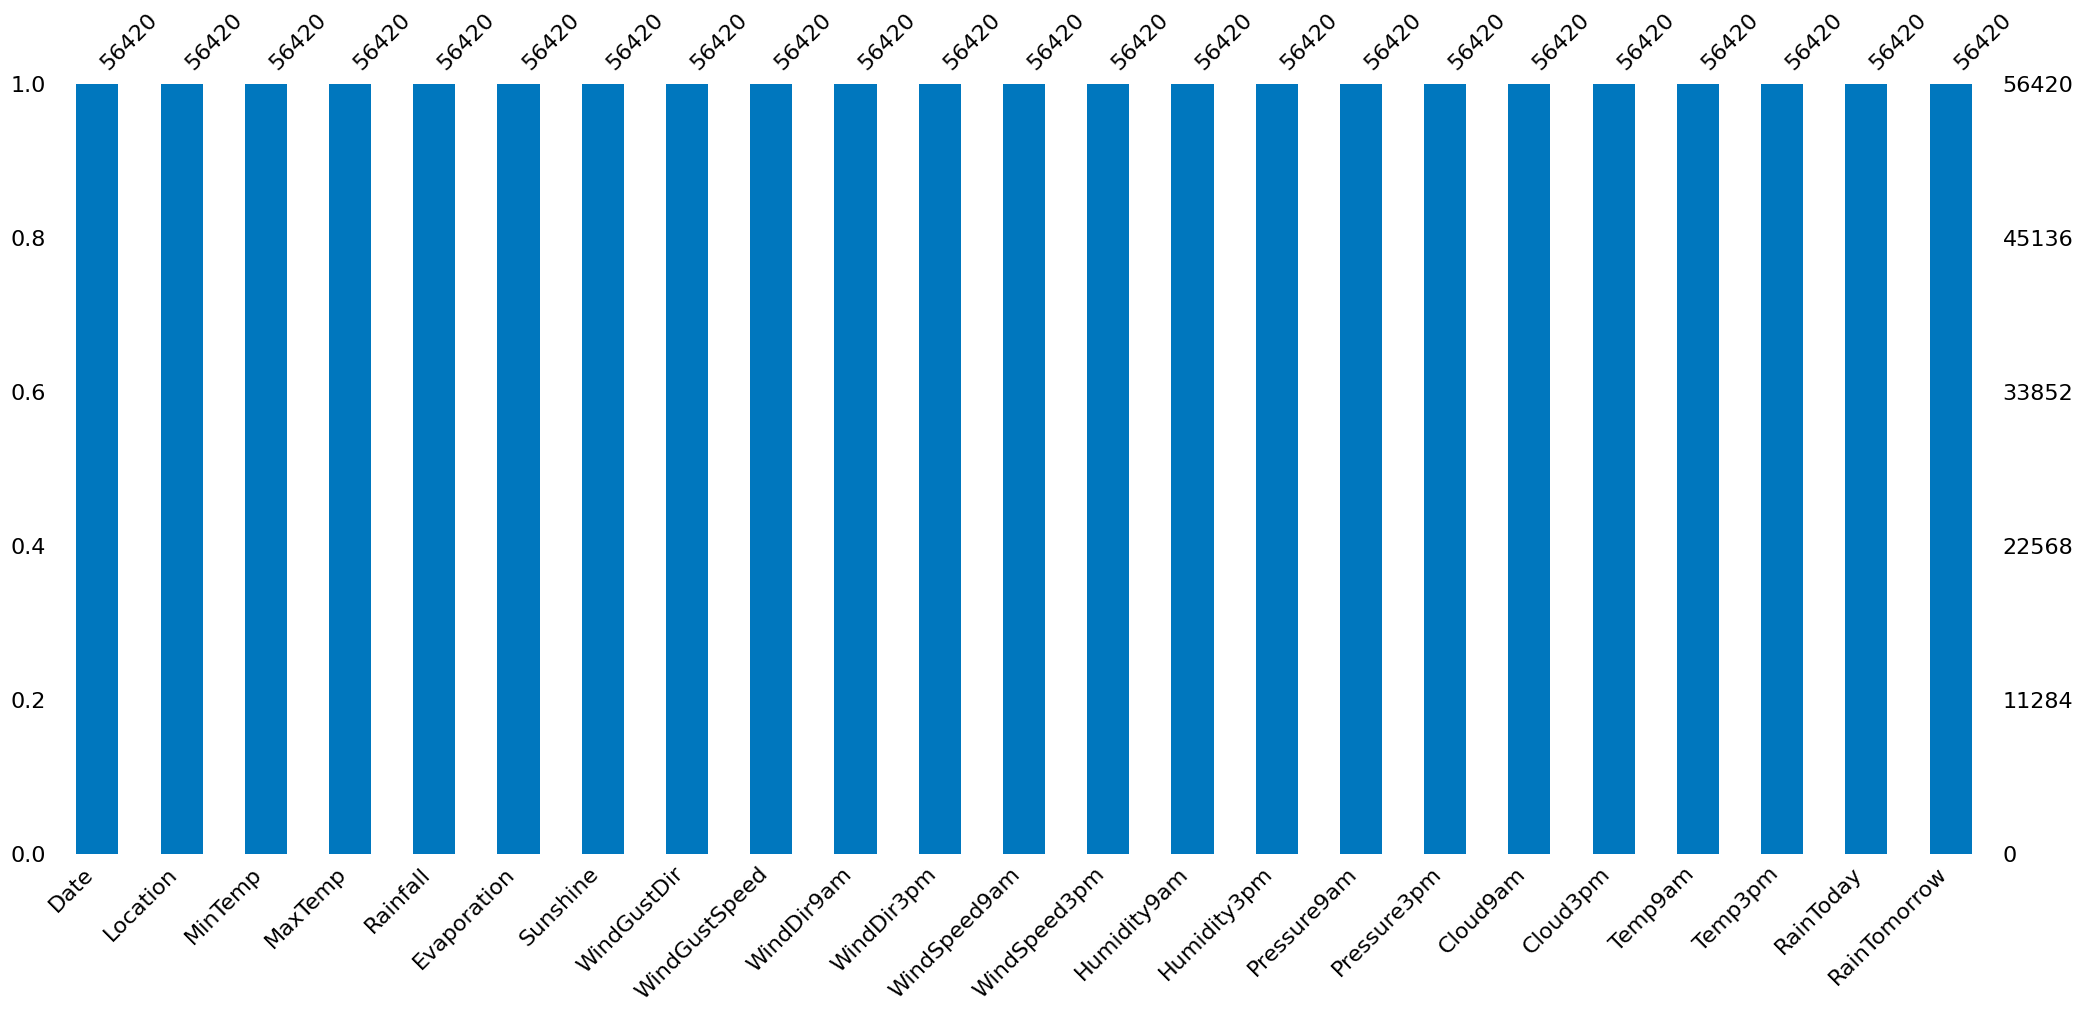

In [202]:
msno.bar(data, color="#0077be")

In [203]:
label_encoder = preprocessing.LabelEncoder()
data['WindGustDir'] = label_encoder.fit_transform(data['WindGustDir'])
data['WindDir9am'] = label_encoder.fit_transform(data['WindDir9am'])
data['WindDir3pm'] = label_encoder.fit_transform(data['WindDir3pm'])
data['Location'] = label_encoder.fit_transform(data['Location'])
data['RainTomorrow'] = label_encoder.fit_transform(data['RainTomorrow'])
data['RainToday'] = label_encoder.fit_transform(data['RainToday'])

print(data.dtypes)

Date              object
Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object


In [204]:
X_raw = data[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]
Y_raw = data['RainTomorrow']

print(X_raw)
len(X_raw)

print(data.dtypes)
print(len(data))

        Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049           4     17.9     35.2       0.0         12.0      12.3   
6050           4     18.4     28.9       0.0         14.8      13.0   
6052           4     19.4     37.6       0.0         10.8      10.6   
6053           4     21.9     38.4       0.0         11.4      12.2   
6054           4     24.2     41.0       0.0         11.2       8.4   
...          ...      ...      ...       ...          ...       ...   
142298         6     19.3     33.4       0.0          6.0      11.0   
142299         6     21.2     32.6       0.0          7.6       8.6   
142300         6     20.7     32.8       0.0          5.6      11.0   
142301         6     19.5     31.8       0.0          6.2      10.6   
142302         6     20.2     31.7       0.0          5.6      10.7   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  WindSpeed3pm  \
6049             11           48.0           1          12  ...   

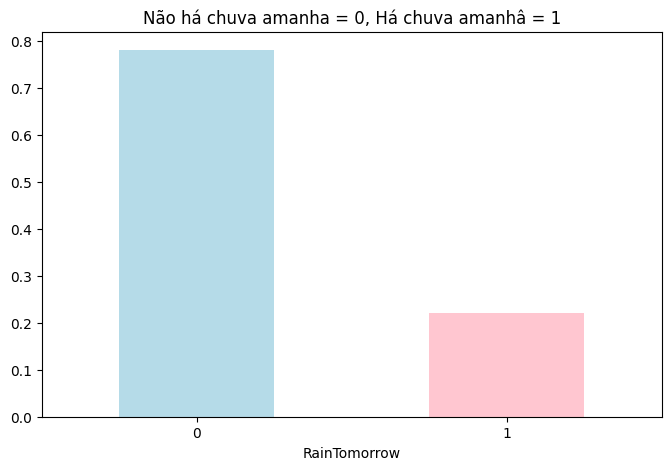

In [205]:
fig = plt.figure(figsize = (8,5))
data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['lightblue','pink'], alpha = 0.9, rot=0)
plt.title('Não há chuva amanha = 0, Há chuva amanhâ = 1')
plt.show()

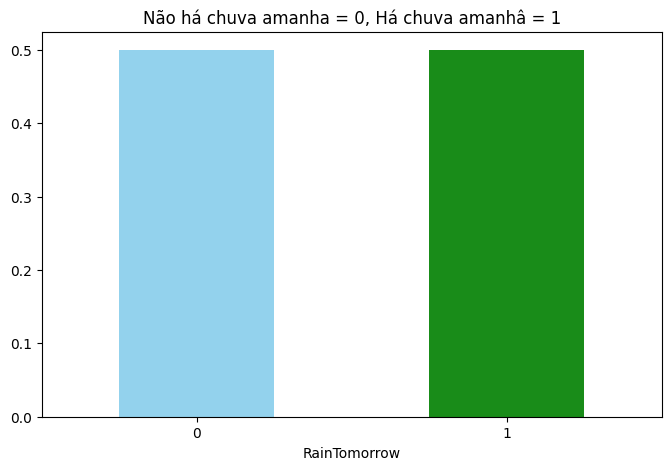

In [206]:
no = data[data.RainTomorrow == 0]
yes = data[data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','green'], alpha = 0.9, rot=0)
plt.title('Não há chuva amanha = 0, Há chuva amanhâ = 1')
plt.show()

In [207]:
X_balanced = oversampled.drop([ "Date","RainTomorrow"], axis=1)
Y_balanced = oversampled["RainTomorrow"]

In [208]:
print(X_balanced)
len(X_balanced)

        Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049           4     17.9     35.2       0.0         12.0      12.3   
6050           4     18.4     28.9       0.0         14.8      13.0   
6052           4     19.4     37.6       0.0         10.8      10.6   
6053           4     21.9     38.4       0.0         11.4      12.2   
6054           4     24.2     41.0       0.0         11.2       8.4   
...          ...      ...      ...       ...          ...       ...   
101049        12      4.9     13.5       1.8          0.8       1.9   
61706         18      2.2     11.9       0.0          2.0       0.7   
118506        16      8.8     24.3       0.0          0.8       8.4   
62083         18      9.7     12.1       2.0          1.0       0.0   
89647          2     23.9     28.4       2.6          2.6       0.6   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  WindSpeed3pm  \
6049             11           48.0           1          12  ...   

87986

In [209]:
X_balanced_train, X_balanced_test, Y_balanced_train, Y_balanced_test = train_test_split(X_balanced,Y_balanced, test_size =0.2, stratify = Y_balanced, random_state = 0)

In [210]:
X_balanced_train.dtypes

Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
dtype: object

In [211]:
Y_balanced_train.dtypes

dtype('int64')

In [212]:
print(len(X_balanced_train))
print(len(X_balanced_test))
print(len(X_balanced_train)/len(X_balanced))

70388
17598
0.799990907644398


In [213]:
pca = PCA(n_components=0.6)
pca.fit(X_balanced)

PCA(n_components=0.6)

In [214]:
Z = pca.transform(X_balanced)

In [215]:
Z.mean(axis=0)

array([-1.03644625e-13,  2.13043907e-14])

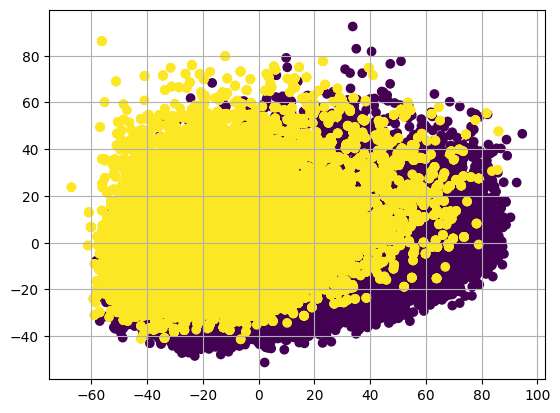

In [216]:
plt.scatter(Z[:,0],Z[:,1],c=Y_balanced)
plt.grid()

In [217]:
Z_train, Z_test, yz_train, yz_test = train_test_split(Z,Y_balanced, test_size =0.2, stratify = Y_balanced, random_state = 0)

In [218]:
model_1 = Pipeline((("scaler", StandardScaler()), ("log_reg", LogisticRegression()))).fit(X_balanced_train, Y_balanced_train)
y_pred_1 = model_1.predict(X_balanced_test)
y_pred_1t = model_1.predict(X_balanced_train)

model_2 = Pipeline((("scaler", StandardScaler()), ("linear_svc", LinearSVC(C=1, max_iter=1000000, dual=True)))).fit(X_balanced_train, Y_balanced_train)
y_pred_2 = model_2.predict(X_balanced_test)
y_pred_2t = model_2.predict(X_balanced_train)

model_3 = Pipeline((("scaler", StandardScaler()), ("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("log_reg", LogisticRegression(max_iter=10000, dual=False)))).fit(X_balanced_train, Y_balanced_train)
y_pred_3 = model_3.predict(X_balanced_test)
y_pred_3t = model_3.predict(X_balanced_train)

model_4 = Pipeline((("scaler", StandardScaler()), ("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("poli_SVM", (LinearSVC(C=1, max_iter=10000))))).fit(X_balanced_train, Y_balanced_train)
y_pred_4 = model_4.predict(X_balanced_test)
y_pred_4t = model_4.predict(X_balanced_train)

model_5 = Pipeline((("scaler", StandardScaler()), ("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("log_reg", LogisticRegression(penalty=None, max_iter=1000)))).fit(Z_train, yz_train)
y_pred_5 = model_5.predict(Z_test)
y_pred_5t = model_5.predict(Z_train)

/home/rogerio/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/rogerio/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


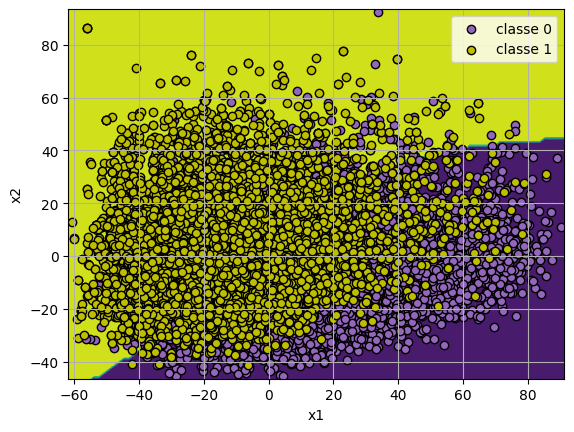

In [219]:
disp_1 = DecisionBoundaryDisplay.from_estimator(model_5,Z_test,response_method="predict",alpha=1)
disp_1.ax_.scatter(Z_test[yz_test==0,0],Z_test[yz_test==0,1],c='tab:purple',label="classe 0",edgecolor="k")
disp_1.ax_.scatter(Z_test[yz_test==1,0],Z_test[yz_test==1,1],c='y',label="classe 1",edgecolor="k")
disp_1.ax_.legend()
plt.xlabel("x1")
plt.ylabel("x2")
disp_1.ax_.grid()

Matriz de Confusão:
[[7090 1709]
 [1790 7009]]
Accuracia: 80.12%


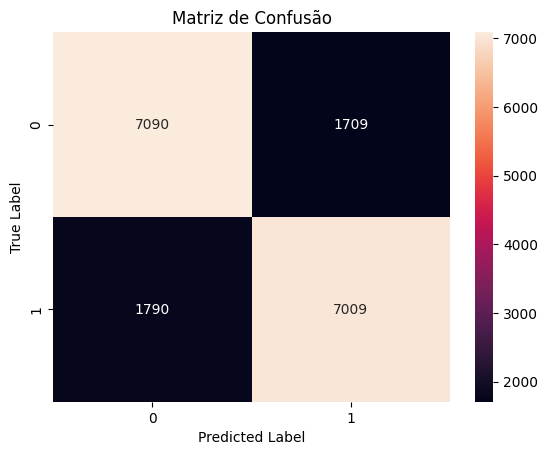

In [220]:
cm = confusion_matrix(Y_balanced_test, y_pred_1)
acc_reg_test = accuracy_score(Y_balanced_test, y_pred_1)
print("Matriz de Confusão:")
print(cm)
print("Accuracia: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusão')
plt.show()

Matriz de Confusão:
[[7118 1681]
 [1819 6980]]
Accuracia: 80.11%


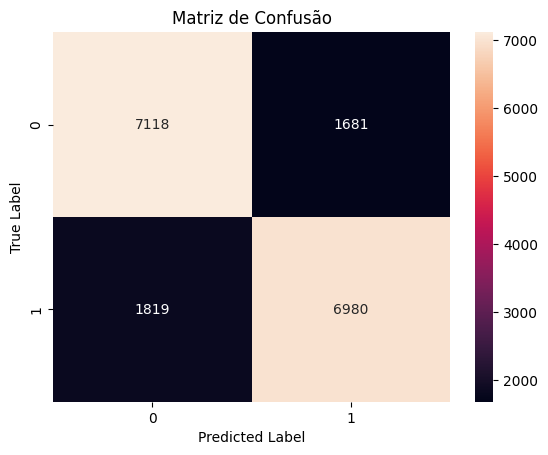

In [221]:
cm = confusion_matrix(Y_balanced_test, y_pred_2)
acc_reg_test = accuracy_score(Y_balanced_test, y_pred_2)
print("Matriz de Confusão:")
print(cm)
print("Accuracia: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusão')
plt.show()

Matriz de Confusão:
[[7175 1624]
 [1399 7400]]
Accuracia: 82.82%


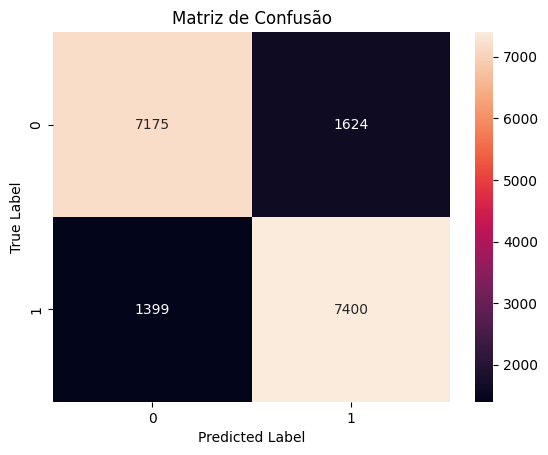

In [222]:
cm = confusion_matrix(Y_balanced_test, y_pred_3)
acc_reg_test = accuracy_score(Y_balanced_test, y_pred_3)
print("Matriz de Confusão:")
print(cm)
print("Accuracia: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusão')
plt.show()

Matriz de Confusão:
[[7157 1642]
 [1454 7345]]
Accuracia: 82.41%


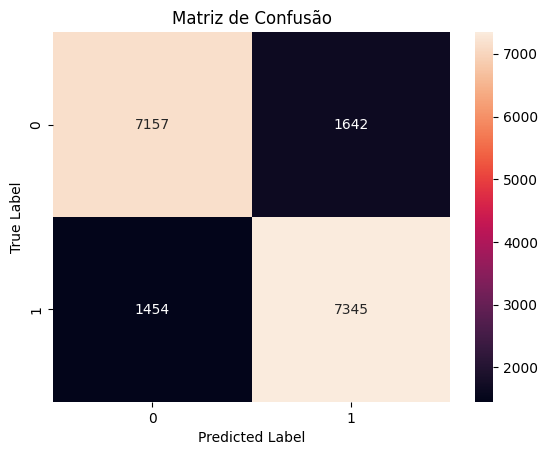

In [223]:
cm = confusion_matrix(Y_balanced_test, y_pred_4)
acc_reg_test = accuracy_score(Y_balanced_test, y_pred_4)
print("Matriz de Confusão:")
print(cm)
print("Accuracia: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusão')
plt.show()

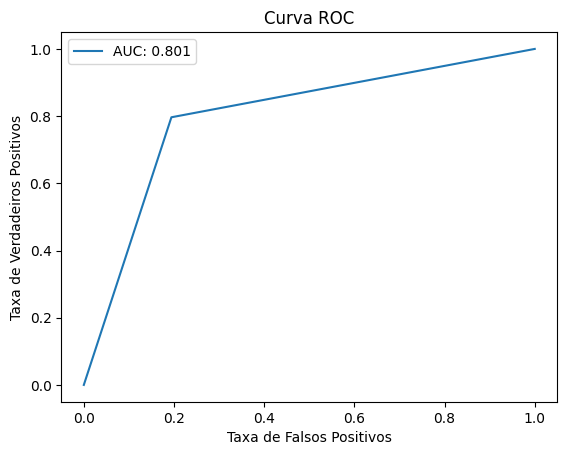

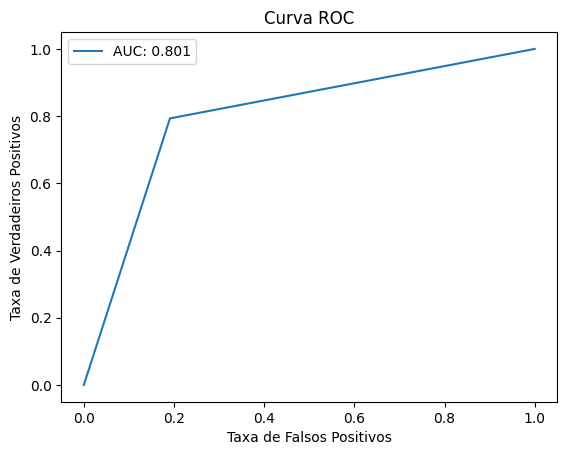

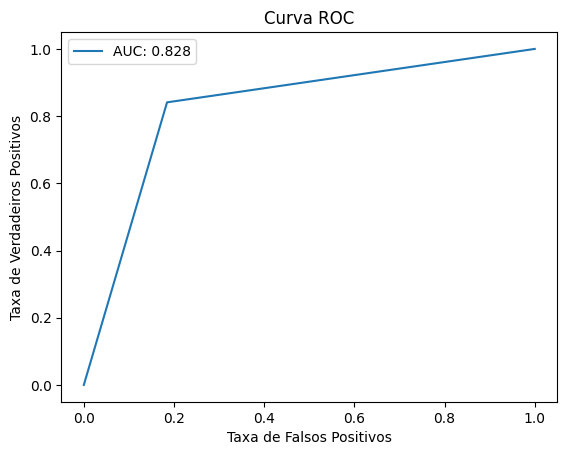

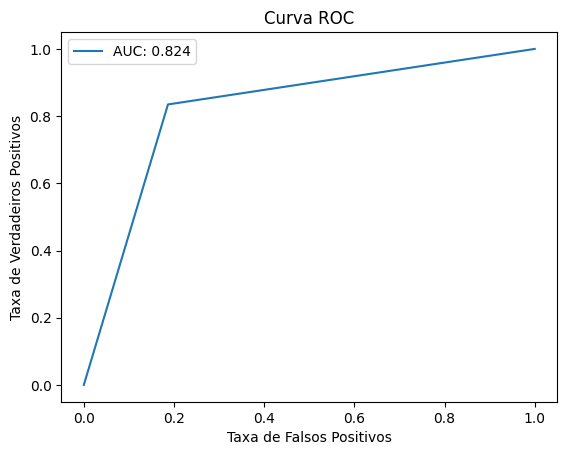

In [224]:
fpr, tpr, thresholds = roc_curve(Y_balanced_test, y_pred_1)
auc = roc_auc_score(Y_balanced_test, y_pred_1)

plt.plot(fpr, tpr, label='AUC: {:.3f}'.format(auc))
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

fpr, tpr, thresholds = roc_curve(Y_balanced_test, y_pred_2)
auc = roc_auc_score(Y_balanced_test, y_pred_2)

plt.plot(fpr, tpr, label='AUC: {:.3f}'.format(auc))
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

fpr, tpr, thresholds = roc_curve(Y_balanced_test, y_pred_3)
auc = roc_auc_score(Y_balanced_test, y_pred_3)

plt.plot(fpr, tpr, label='AUC: {:.3f}'.format(auc))
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

fpr, tpr, thresholds = roc_curve(Y_balanced_test, y_pred_4)
auc = roc_auc_score(Y_balanced_test, y_pred_4)

plt.plot(fpr, tpr, label='AUC: {:.3f}'.format(auc))
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

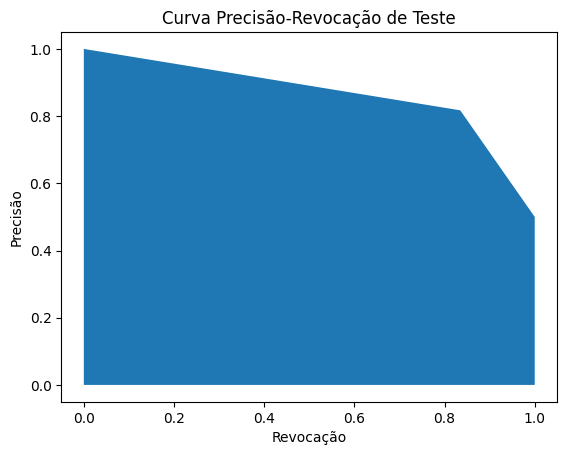

In [225]:
precision, recall, thresholds = precision_recall_curve(Y_balanced_test, y_pred_4)
plt.fill_between(recall, precision)
plt.ylabel("Precisão")
plt.xlabel("Revocação")
plt.title("Curva Precisão-Revocação de Teste");

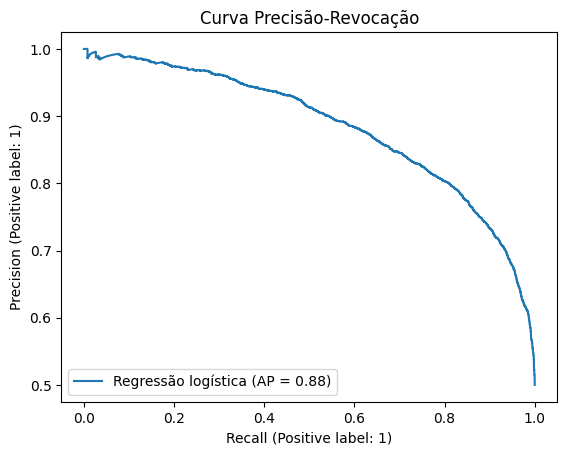

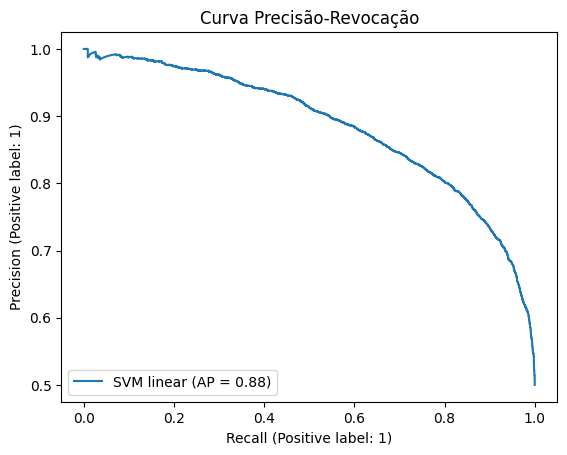

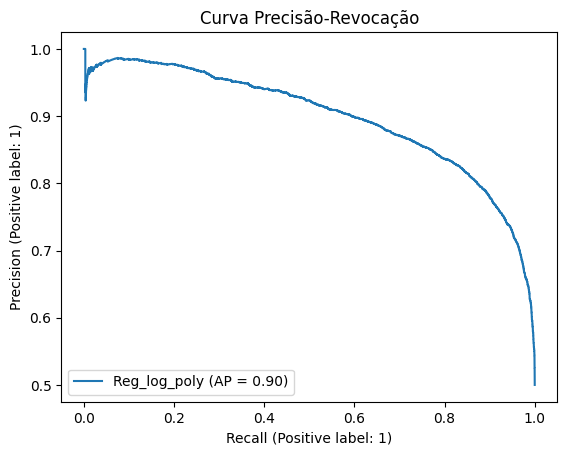

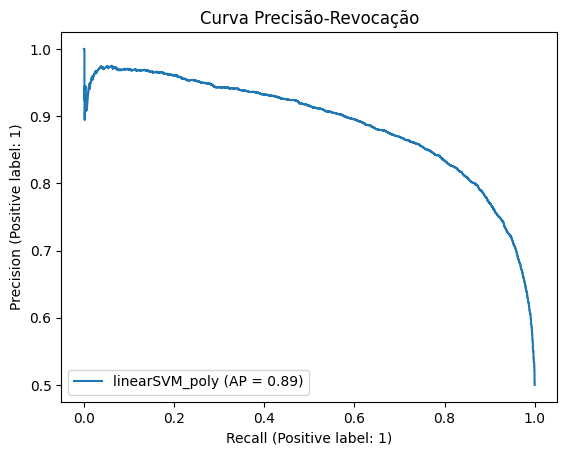

In [226]:
display = PrecisionRecallDisplay.from_estimator(model_1, X_balanced_test, Y_balanced_test, name="Regressão logística")
_ = display.ax_.set_title("Curva Precisão-Revocação")

display = PrecisionRecallDisplay.from_estimator(model_2, X_balanced_test, Y_balanced_test, name="SVM linear")
_ = display.ax_.set_title("Curva Precisão-Revocação")

display = PrecisionRecallDisplay.from_estimator(model_3, X_balanced_test, Y_balanced_test, name="Reg_log_poly")
_ = display.ax_.set_title("Curva Precisão-Revocação")

display = PrecisionRecallDisplay.from_estimator(model_4, X_balanced_test, Y_balanced_test, name="linearSVM_poly")
_ = display.ax_.set_title("Curva Precisão-Revocação")

In [227]:
accuracy = accuracy_score(Y_balanced_test, y_pred_1)
accuracy_0 = accuracy_score(Y_balanced_train, y_pred_1t)
print(f'Accuracia com Dados de Teste: {accuracy}')
print(f'Accuracia com Dados de Treino: {accuracy_0}')

report = classification_report(Y_balanced_test, y_pred_1)
report_0 = classification_report(Y_balanced_train, y_pred_1t)
print(report)
print(report_0)

Accuracia com Dados de Teste: 0.801170587566769
Accuracia com Dados de Treino: 0.7990140364834915
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      8799
           1       0.80      0.80      0.80      8799

    accuracy                           0.80     17598
   macro avg       0.80      0.80      0.80     17598
weighted avg       0.80      0.80      0.80     17598

              precision    recall  f1-score   support

           0       0.79      0.81      0.80     35194
           1       0.81      0.79      0.80     35194

    accuracy                           0.80     70388
   macro avg       0.80      0.80      0.80     70388
weighted avg       0.80      0.80      0.80     70388



In [228]:
accuracy = accuracy_score(Y_balanced_test, y_pred_2)
accuracy_0 = accuracy_score(Y_balanced_train, y_pred_2t)
print(f'Accuracia com Dados de Teste: {accuracy}')
print(f'Accuracia com Dados de Treino: {accuracy_0}')

report = classification_report(Y_balanced_test, y_pred_2)
report_0 = classification_report(Y_balanced_train, y_pred_2t)
print(report)
print(report_0)

Accuracia com Dados de Teste: 0.8011137629276054
Accuracia com Dados de Treino: 0.7986020344376883
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      8799
           1       0.81      0.79      0.80      8799

    accuracy                           0.80     17598
   macro avg       0.80      0.80      0.80     17598
weighted avg       0.80      0.80      0.80     17598

              precision    recall  f1-score   support

           0       0.79      0.81      0.80     35194
           1       0.81      0.78      0.80     35194

    accuracy                           0.80     70388
   macro avg       0.80      0.80      0.80     70388
weighted avg       0.80      0.80      0.80     70388



In [229]:
accuracy = accuracy_score(Y_balanced_test, y_pred_3)
accuracy_0 = accuracy_score(Y_balanced_train, y_pred_3t)
print(f'Accuracia com Dados de Teste: {accuracy}')
print(f'Accuracia com Dados de Treino: {accuracy_0}')

report = classification_report(Y_balanced_test, y_pred_3)
report_0 = classification_report(Y_balanced_train, y_pred_3t)
print(report)
print(report_0)

Accuracia com Dados de Teste: 0.8282191158086146
Accuracia com Dados de Treino: 0.8421748025231574
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      8799
           1       0.82      0.84      0.83      8799

    accuracy                           0.83     17598
   macro avg       0.83      0.83      0.83     17598
weighted avg       0.83      0.83      0.83     17598

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     35194
           1       0.84      0.85      0.84     35194

    accuracy                           0.84     70388
   macro avg       0.84      0.84      0.84     70388
weighted avg       0.84      0.84      0.84     70388



In [230]:
accuracy = accuracy_score(Y_balanced_test, y_pred_4)
accuracy_0 = accuracy_score(Y_balanced_train, y_pred_4t)
print(f'Accuracia com Dados de Teste: {accuracy}')
print(f'Accuracia com Dados de Treino: {accuracy_0}')

report = classification_report(Y_balanced_test, y_pred_4)
report_0 = classification_report(Y_balanced_train, y_pred_4t)
print(report)
print(report_0)


Accuracia com Dados de Teste: 0.8240709171496761
Accuracia com Dados de Treino: 0.8365488435528783
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      8799
           1       0.82      0.83      0.83      8799

    accuracy                           0.82     17598
   macro avg       0.82      0.82      0.82     17598
weighted avg       0.82      0.82      0.82     17598

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     35194
           1       0.83      0.84      0.84     35194

    accuracy                           0.84     70388
   macro avg       0.84      0.84      0.84     70388
weighted avg       0.84      0.84      0.84     70388

